# Perceptron 感知机

sklearn 实现感知机

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import Perceptron

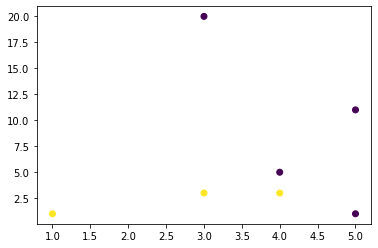

In [2]:
X_train = np.array([[3, 3], [4, 3],  [5, 11], [1, 1], [4, 5], [5, 1], [3, 20]])
y_train = np.array([1, 1, -1, 1, -1, -1, -1])

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)

In [3]:
perceptron = Perceptron()
perceptron.fit(X_train, y_train)

print("w:", perceptron.coef_)
print("b:", perceptron.intercept_)
print("n_iter:", perceptron.n_iter_)

w: [[ 0. -5.]]
b: [9.]
n_iter: 10


In [4]:
perceptron.score(X_train, y_train)

0.5714285714285714

In [5]:
X_test = np.array([[6, 6], [6, 3],  [2, 11], [1, 5]])
y_test = np.array([1, -1, 1, 1])

perceptron.predict(X_test)

array([-1, -1, -1, -1])

In [6]:
perceptron.score(X_test, y_test)

0.25

简直感人，看看训练出来的模型长什么样吧。

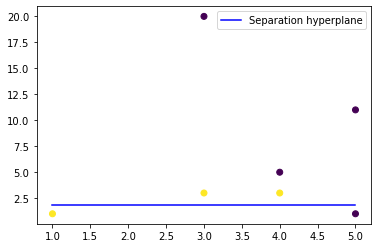

In [7]:
# c=y_train, 因为 y_train 只包含 1 和 -1，可以直接设置为两种颜色
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)

minX = np.min(X_train[:, 0])
maxX = np.max(X_train[:, 0])
line_x = np.array([minX, maxX])

line_y = -(perceptron.coef_[0][0] * line_x + perceptron.intercept_) / perceptron.coef_[0][1]
plt.plot(line_x, line_y, 'b-', label='Separation hyperplane')
plt.legend()
plt.show()

## 增加数据量再试一次

用 make_classification 创建 1000 个数据。

In [8]:
from sklearn.datasets import make_classification

# n_features = n_informative + n_redundant + n_repeated； 
X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_informative=2, n_classes=2, n_clusters_per_class=1)
y = np.array([1 if i == 1 else -1 for i in y])

# 训练数据和测试数据; 800个训练集，剩下的用于评估模型
X_data_train = X[:800,:]
X_data_test = X[800:,:]
y_data_train = y[:800]
y_data_test = y[800:]

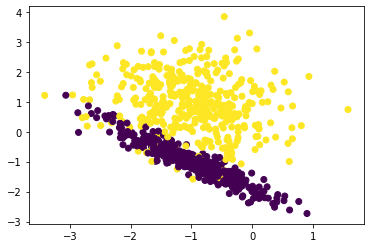

In [9]:
plt.scatter(X_data_train[:, 0], X_data_train[:, 1], c=y_data_train)

In [10]:
perceptron2 = Perceptron()
perceptron2.fit(X_data_test, y_data_test)

print("w:", perceptron2.coef_)
print("b:", perceptron2.intercept_)
print("n_iter:", perceptron2.n_iter_)

w: [[4.97509493 5.37632711]]
b: [7.]
n_iter: 11


In [11]:
perceptron2.score(X_data_train, y_data_train)

0.9425

In [12]:
perceptron2.score(X_data_test, y_data_test)

0.94

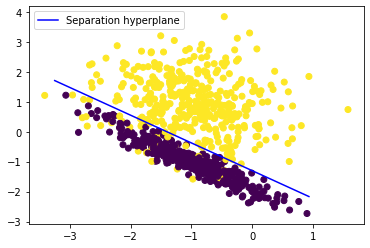

In [13]:
plt.scatter(X_data_train[:, 0], X_data_train[:, 1], c=y_data_train)

minX = np.min(X_data_test[:, 0])
maxX = np.max(X_data_test[:, 0])
line_x = np.array([minX, maxX])

line_y = -(perceptron2.coef_[0][0] * line_x + perceptron2.intercept_) / perceptron2.coef_[0][1]
plt.plot(line_x, line_y, 'b-', label='Separation hyperplane')
plt.legend()
plt.show()